In [75]:
ls # just to see files in current directory

'Cyber Bulling.ipynb'   dataset.csv


In [1]:
import numpy as np
import math
import pandas as pd

# Plotting libraries
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sb

# Natural Language Toolkit library for text processing
import nltk
from nltk import sent_tokenize, word_tokenize
import re

# Importing Sklearn 
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfVectorizer, CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, make_scorer

from time import time
import pickle # Library to save models

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.sample(3) # just printing 3 random sample from dataset

,headline,label
17002,Meri sab grp pe gand marta hai😂,-1
897,whosoever has mentioned yadavs as shudras is p...,-1
3482,year old editor who probably sh ts his pants ...,-1


In [4]:
df.label.unique() # checking classes in dataset

array([-1,  0])

In [5]:
# As this -1 and 0 so change the -1 to 1 and make it 0 and 1

def change_lable_name(file):
    df = pd.read_csv(file)

    for row in df.index:
        if df.loc[row , "label"] == -1:
            df.loc[row, "label"] = 1

    return df
    

In [6]:
file = "dataset.csv"
df = change_lable_name(file) # call it now labels have changed and are [0, 1]

In [7]:
df.sample(5)

,headline,label
9179,afd please see wikipedia articles for deletion...,0
7120,bitch nobody cares about your myspace you ugly...,1
5379,all above text is used as proof do you want m...,1
2037,nazi you can delete my talk page but i do it ...,1
4728,blow me you can fuck off warn all you want d...,1


In [8]:
# Data Shape
row, columns = df.shape
print("No. of row are ->",row)
print("No. of columns are ->",columns)

No. of row are -> 18148
No. of columns are -> 2


In [9]:
# Data Distribution

def check_data_distribution(df):

    total_row = df.shape[0] # it will return 
    print("Total =", total_row)
    
    one_labled = df[df.label == 1].shape[0]
    print("One labeled values =", one_labled)

    zero_label = total_row - one_labled
    print("Zero labeled values =", zero_label, 5*"\n")

    sclices = [one_labled, zero_label]
    labels = ["Toxic", "NOT-Toxic"]

    explode = [0.1, 0]

    plt.pie(sclices,explode = explode, wedgeprops={"edgecolor":"black"}, labels = labels, shadow=True)
    plt.title("Toxic vs Non-Toxic comments in Dataset")
    plt.tight_layout()
   # plt.show()
    plt.savefig("Toxic vs Non-Toxic")

Total = 18148
One labeled values = 11661
Zero labeled values = 6487 







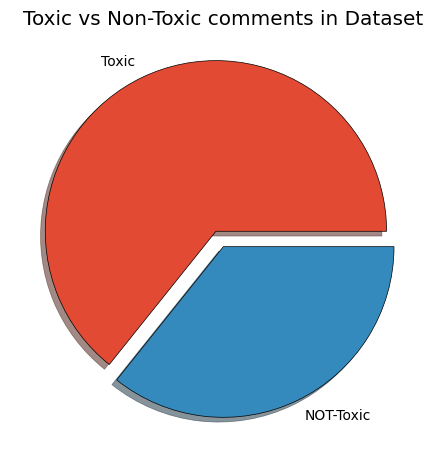

In [10]:
check_data_distribution(df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  18148 non-null  object
 1   label     18148 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 283.7+ KB


In [19]:
# Remove Noise from Dataset

def remove_noise(input_sen, pattern):
    if (type(input_sen)==str):
        matched = re.findall(pattern, input_sen) # will return list
        print(matched)
        
        for i in matched: # now iterate on list of 
            input_sen = re.sub(i, "", input_sen)
            return input_sen
    else:
        return ""